# Project 2: Biomechanical features of orthopedic patients 

## Brief Project Description

In this project, we want to build a machine learning model with data of biomechanical features of orthopedic patients. The task for the machine learning model consists in classifying patients as belonging to one out of three categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).

In particular, we want to use kNN or k-Nearest Neighbours Classifier, to create our Machine Learning Model. Moreover, a focus in this project is on outlier handling. To do so, we first visualize the outliers and second apply IQR_method to the detected and handle outliers.

The dataset that we are using throughout this project together with a detailed description can be found here: https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients

### Import necessary libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('column_3C_weka.csv')

In [4]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


### Check the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### Exploratory data analysis

For figuring out what the data can tell us and we use a pairplot. A pairplot allows us to see both distribution of single variables and relationships between two variables.

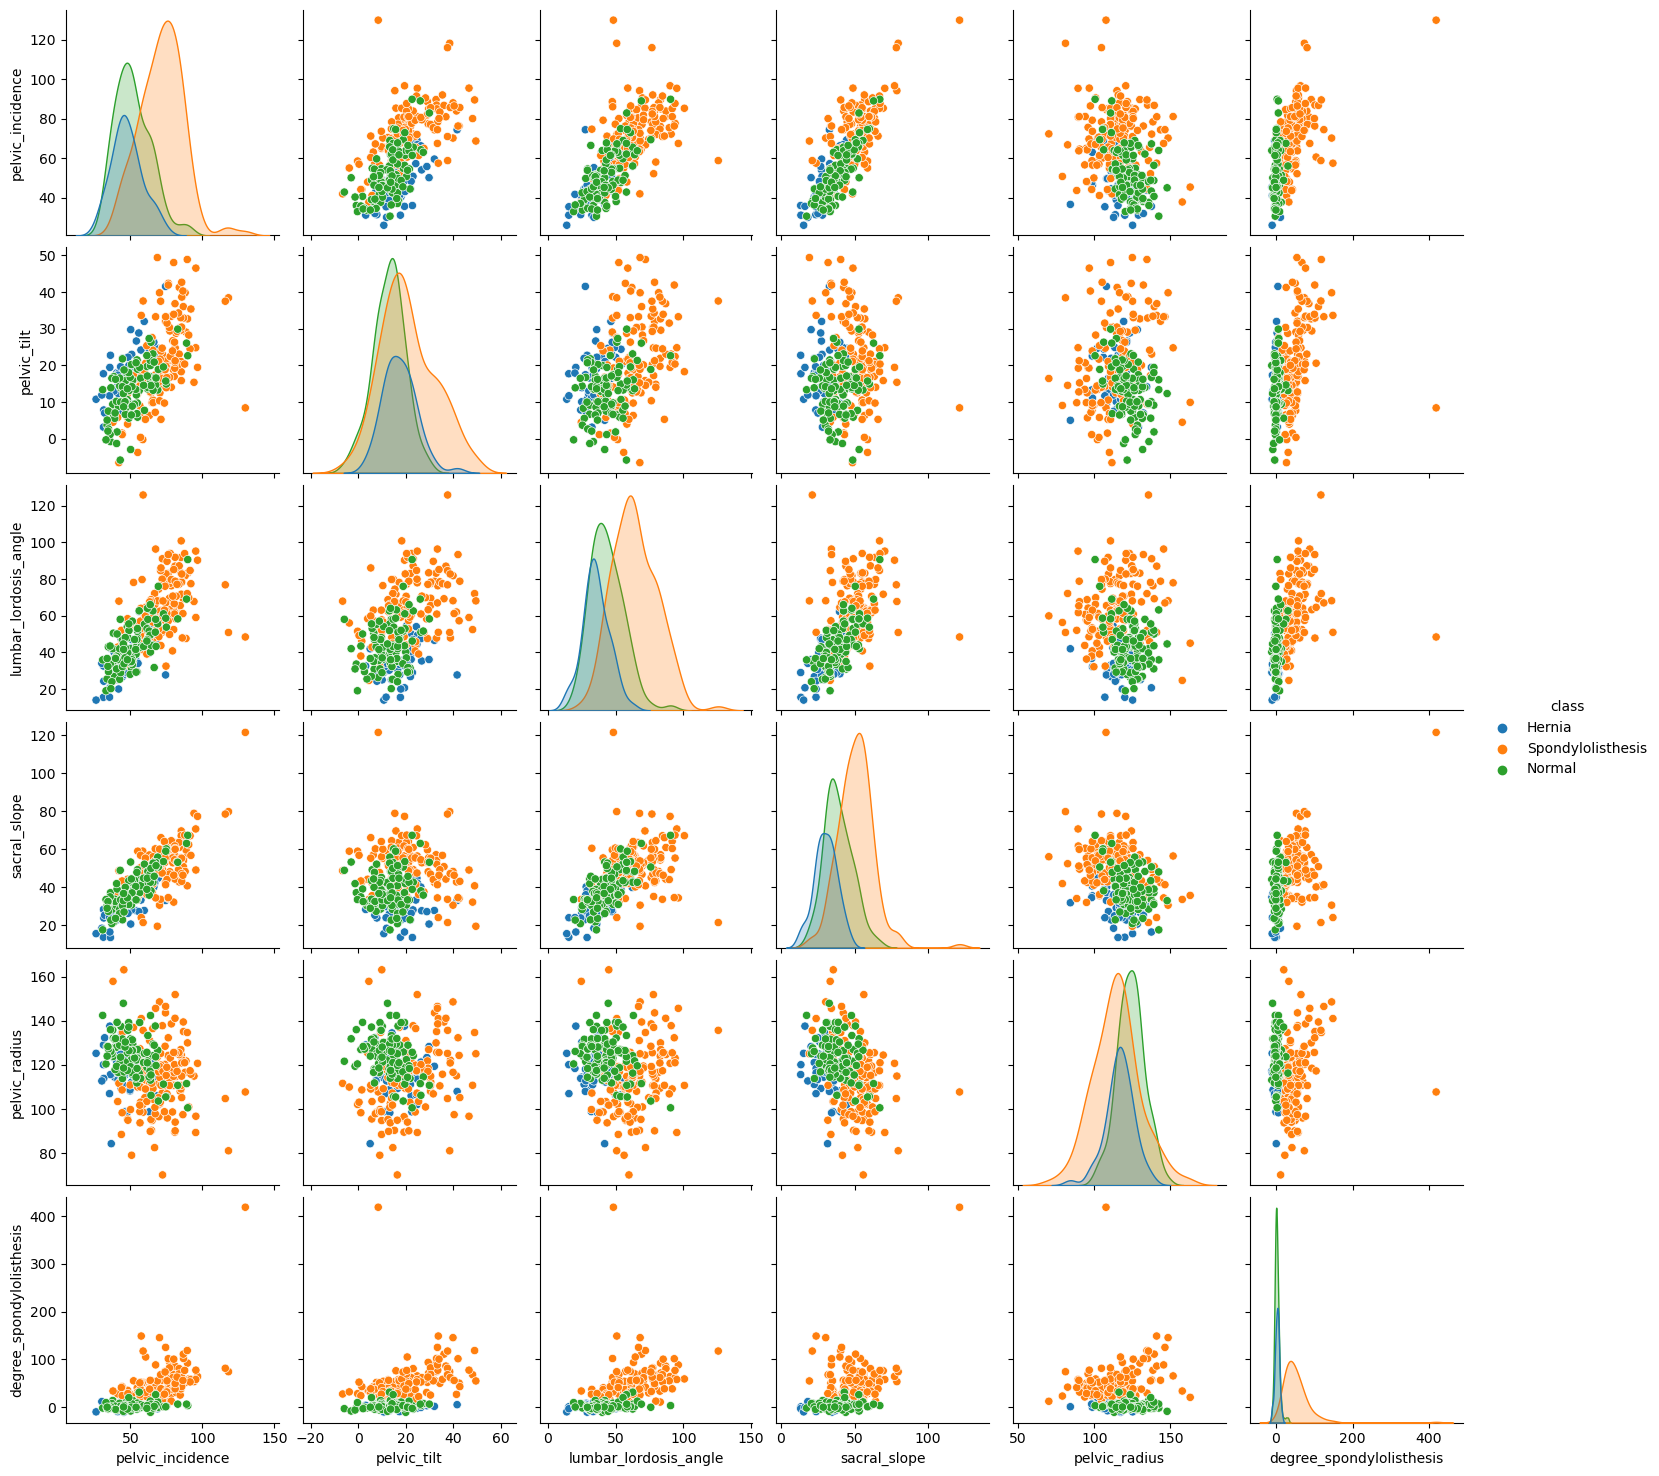

In [7]:
sns.pairplot(data=df, hue='class');

One observation we can make is that some features of data points are stacked on top of each other. For instance, for the features 'pelvic_incidence' and 'pelvic_tilt'we have:

<AxesSubplot:xlabel='pelvic_incidence', ylabel='pelvic_tilt'>

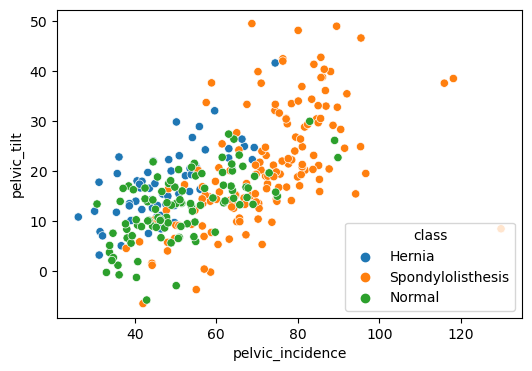

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(data= df, x='pelvic_incidence', y='pelvic_tilt', hue='class')

We also take a look at the distribution of the labels that belong to the target column 'class'.

In [9]:
df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

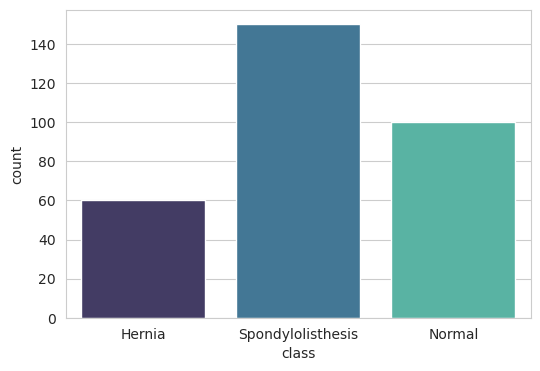

In [10]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.countplot(data=df, x='class', palette="mako");

We calculate the correlation between the various features and the "class" column. To do this we need to map the column to 0,1 and 2 instead of a string.

In [11]:
df['encoded_class']=df['class'].map({'Spondylolisthesis': 0, 'Normal': 1, 'Hernia': 2})

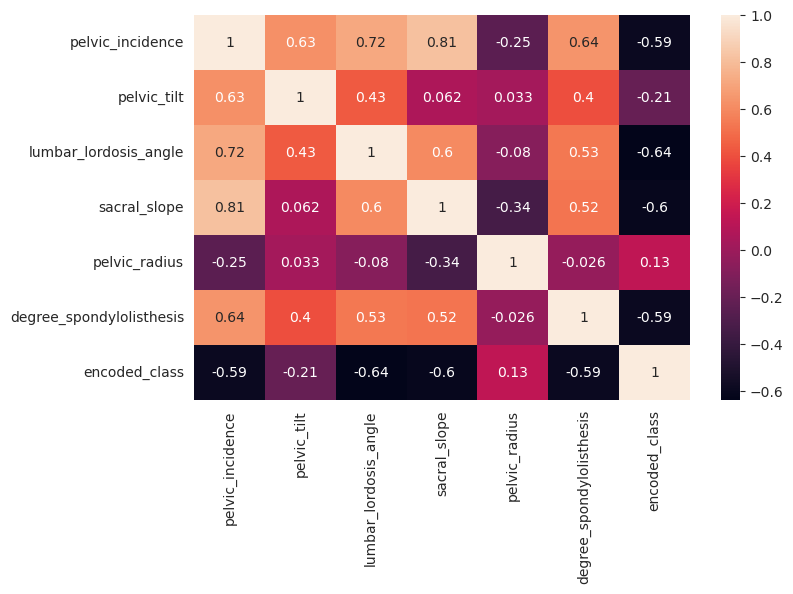

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True);

Create a bar plot of the correlation values to encoded_class.

<AxesSubplot:>

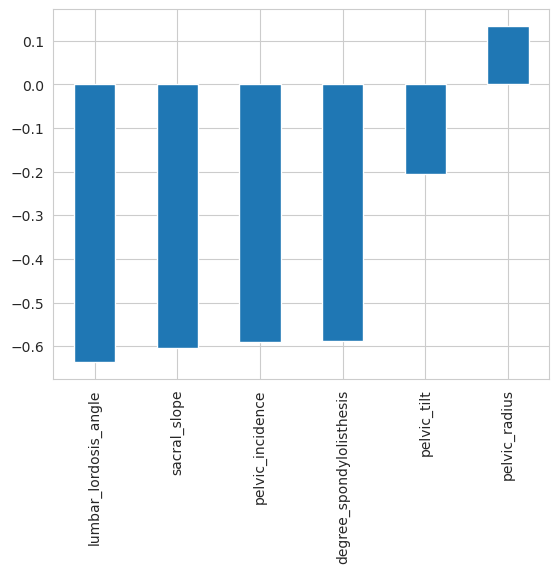

In [13]:
df.corr()['encoded_class'][:-1].sort_values().plot(kind='bar')

In [14]:
df.drop('encoded_class', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### Outlier  Handling

Next we are going to detect and delete Outliers using the I.Q.R method.

First we merely want to detect the outliers visually. To achieve this we create a boxplot for each numerical column.  

In [16]:
numeric_columns = list(df.select_dtypes(exclude='object').columns)

To get a deeper understanding, how the outliers are distributed to the different classes have th

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.boxplot(x='class', y= "pelvic_incidence", data=df, ax=axes[0,0])
sns.boxplot(x='class', y= "pelvic_tilt", data=df, ax=axes[0,1])
sns.boxplot(x='class', y= "lumbar_lordosis_angle", data=df, ax=axes[1,0])
sns.boxplot(x='class', y= "sacral_slope", data=df, ax=axes[1,1])
sns.boxplot(x='class', y= "pelvic_radius", data=df, ax=axes[2,0])
sns.boxplot(x='class', y= "degree_spondylolisthesis", data=df, ax=axes[2,1])

plt.subplots_adjust(hspace=0.25, wspace=0.25)

By considering that boxplots we clearly see, that there are some outliers within the data. Next we apply the IRQ_method to detect and drop that outliers. There for we that an upper and lower bound 

In [ ]:
outlier_bounds = dict()
numeric_columns = list(df.select_dtypes(exclude='object').columns)

for column in numeric_columns:
    
    bounds=[]
    
    #Get first quartile (Q1) and  third quartile (Q3) for each column
    Q1 = df.describe()[column]['25%']
    Q3 = df.describe()[column]['75%']
    
    #Calculate the upper and lower bound for each column
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR 
    upper_bound = Q3 + 1.5*IQR 
    bounds.append(lower_bound)
    bounds.append(upper_bound)
    
    #Fill the dicctionary with the calculated bounds
    outlier_bounds[column]= bounds

outlier_bounds     

Create a new dataframe without all detected ouliers. 

In [ ]:
for column in outlier_bounds:
    
    df_final = df[~((df[column]<outlier_bounds[column][0]) | (df[column]>outlier_bounds[column][1]))]

In [ ]:
df_final.info()

Comparing to the original data frame, we have a loss of 10 rows after we dropped all outliers. Even we have a small dataset, this loss seems to be negligible.

### Train|Test Split and Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_final.drop('class', axis=1)

In [ ]:
X

In [ ]:
y = df_final['class']

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Build a Machine Learning Model

In this approach, we choose kNN or k-Nearest Neighbours Classifier, to create our Machine Learning Model. One of the crucial issues, when using a k-Nearest Neighbours Classifier, is the question what should be the value of nearest neighbours (k) that yields highest accuracy?


To recieve a k value that yields the highest accuracy, we use the so called __ellbow method__.

Notice, that using the Ellbow Method is just one way to tweak our model's performance. Another possible way, is to optimize our model with a Grid Search approach.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
test_error_rates = []
number_n = []

for n in range(1,50):
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(scaled_X_train,y_train)
    
    preds = knc.predict(scaled_X_test)
    test_error_rate = 1 - accuracy_score(y_test, preds)
    test_error_rates.append(test_error_rate)
    number_n.append(n)
    
    

In [ ]:
ser = pd.Series(data=test_error_rates, index=number_n )

In [ ]:
print('index:', ser.idxmin(), '|error_rate:', ser.min())

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(number_n,test_error_rates, marker='o',markerfacecolor='red')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.title('k Value vs Error Rate')


Since that for k=8 our model returns the lowest error rate, we use that value for creating our final machine learning model.  

In [ ]:
knc_final = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knc_final.fit(scaled_X_train, y_train)

In [ ]:
predictions = knc_final.predict(scaled_X_test)

In [ ]:
predictions 

### Model Evaluation

Now it's time to evalute our created model.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()